In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('nike_products_with_features.csv')
data = data.dropna()

features = data.select_dtypes(include=[np.number]).columns.tolist()
X = data[features].drop(columns=['Sale Quantity'])
y = data['Sale Quantity'].apply(lambda x: 1 if x > 500 else 0)

In [15]:
X

,Price,Initial Price,Discount (%),Discount Amount,Discount Flag,Price Category,Color Diversity Score,Is Just In,Is Best Seller,Is Coming Soon,Is Member Product,Is Sustainable Materials,Is Launching in SNKRS,Is Sold Out,Is Available in SNKRS,Is Customize,Title Word Count,Subtitle Word Count,Marketing Appeal Score
0,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,8
1,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,9
2,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,2,10
3,100.0,100,0,0.0,0,1,4,1,0,0,0,0,0,0,0,0,2,1,9
14,125.0,125,0,0.0,0,2,4,0,1,0,0,0,0,0,0,0,5,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,105.0,105,0,0.0,0,2,4,0,0,0,1,0,0,0,0,0,4,2,6
2550,100.0,100,0,0.0,0,1,3,0,0,0,1,0,0,0,0,0,3,2,9
2553,150.0,150,0,0.0,0,2,3,0,0,0,0,0,0,0,1,0,3,2,6
2554,180.0,180,0,0.0,0,2,3,0,0,0,0,0,0,0,1,0,4,1,10


In [17]:
y

0       0
1       1
2       0
3       0
14      1
       ..
2549    1
2550    1
2553    0
2554    0
2555    0
Name: Sale Quantity, Length: 1222, dtype: int64

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

def svm_model(kernel, C_value):
    print(f"\nKernel: {kernel}, C: {C_value}")
    svm = SVC(kernel=kernel, C=C_value)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Confusion Matrix and Accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
    plt.title(f'SVM Confusion Matrix\nKernel: {kernel}, C: {C_value}, Accuracy: {accuracy:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [12]:
X_train

array([[-0.83868602, -1.02852135, -0.48594534, ..., -0.36102162,
        -0.99636632, -0.46720402],
       [ 0.8181875 ,  0.70802794, -0.48594534, ...,  1.18152532,
         0.73804913, -1.73310935],
       [ 0.23340861,  0.09512819, -0.48594534, ...,  0.41025185,
        -0.99636632,  0.79870132],
       ...,
       [ 3.44969249,  3.46607682, -0.48594534, ...,  1.95279879,
         1.60525685, -0.04523557],
       [-0.54629658, -0.72207147, -0.48594534, ...,  0.41025185,
        -0.99636632, -0.04523557],
       [ 0.8181875 ,  0.70802794, -0.48594534, ...,  1.18152532,
         2.47246457,  0.79870132]])

In [13]:
y_train

1383    1
2430    0
368     1
2364    1
54      1
       ..
2275    1
2326    1
2361    0
2039    1
2357    1
Name: Sale Quantity, Length: 855, dtype: int64

In [5]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]


Kernel: linear, C: 0.1
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       133
           1       0.81      0.98      0.88       234

    accuracy                           0.84       367
   macro avg       0.87      0.78      0.80       367
weighted avg       0.85      0.84      0.83       367



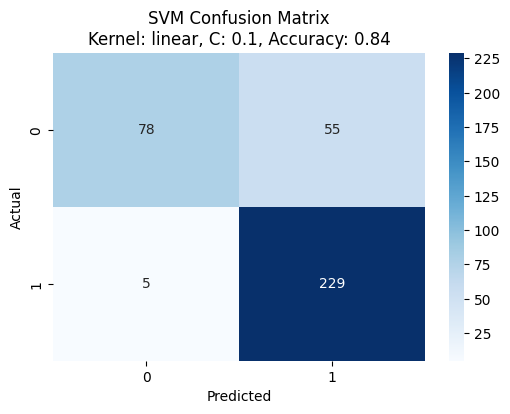


Kernel: linear, C: 1
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       133
           1       0.81      0.98      0.88       234

    accuracy                           0.84       367
   macro avg       0.87      0.78      0.80       367
weighted avg       0.85      0.84      0.83       367



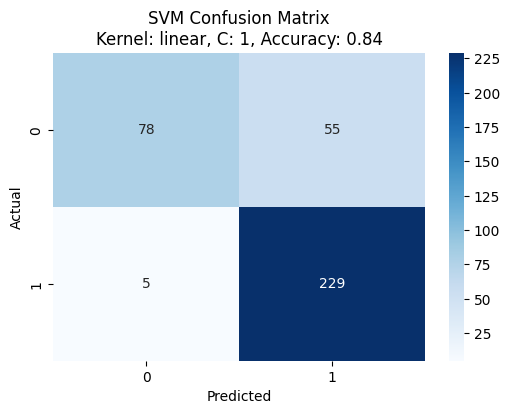


Kernel: linear, C: 10
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       133
           1       0.81      0.98      0.88       234

    accuracy                           0.84       367
   macro avg       0.87      0.78      0.80       367
weighted avg       0.85      0.84      0.83       367



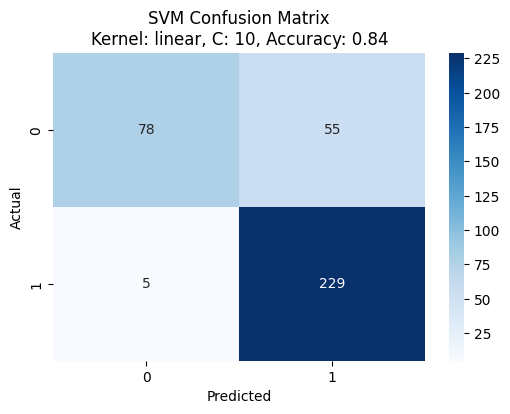


Kernel: poly, C: 0.1
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.56      0.70       133
           1       0.80      0.98      0.88       234

    accuracy                           0.83       367
   macro avg       0.87      0.77      0.79       367
weighted avg       0.85      0.83      0.81       367



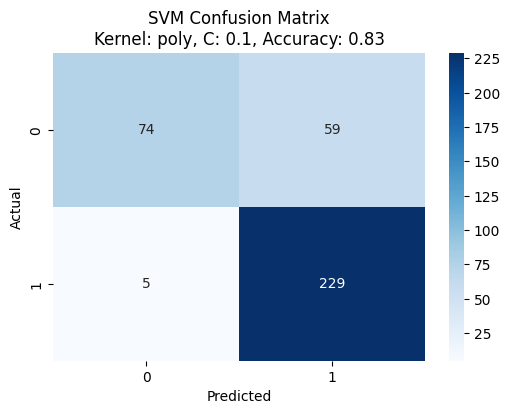


Kernel: poly, C: 1
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.63      0.74       133
           1       0.82      0.95      0.88       234

    accuracy                           0.84       367
   macro avg       0.85      0.79      0.81       367
weighted avg       0.84      0.84      0.83       367



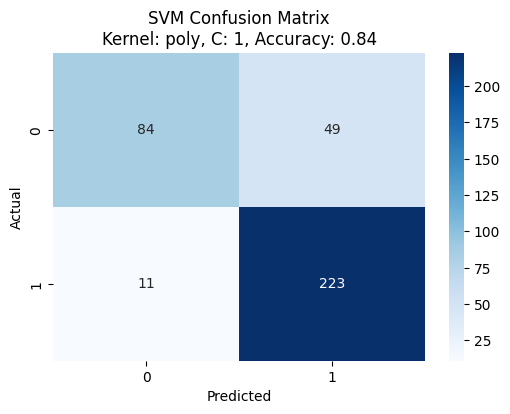


Kernel: poly, C: 10
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       133
           1       0.83      0.94      0.88       234

    accuracy                           0.84       367
   macro avg       0.84      0.80      0.82       367
weighted avg       0.84      0.84      0.83       367



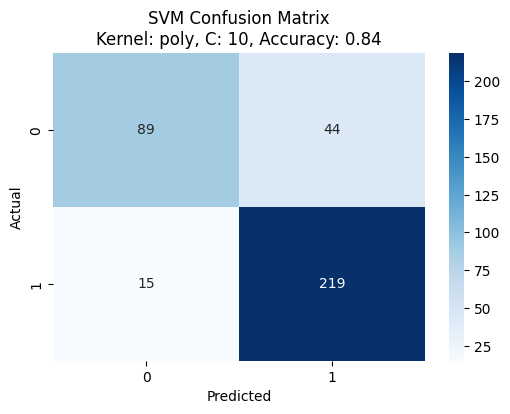


Kernel: rbf, C: 0.1
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71       133
           1       0.80      1.00      0.89       234

    accuracy                           0.84       367
   macro avg       0.90      0.78      0.80       367
weighted avg       0.87      0.84      0.83       367



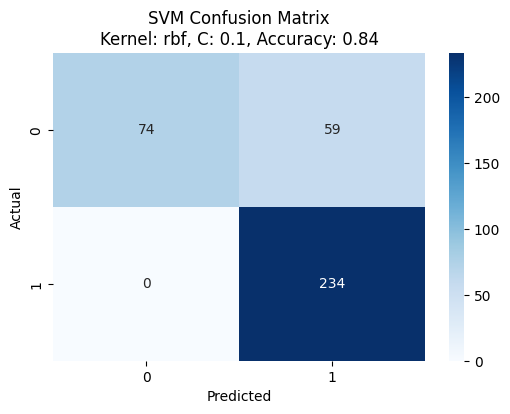


Kernel: rbf, C: 1
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.65      0.74       133
           1       0.83      0.93      0.88       234

    accuracy                           0.83       367
   macro avg       0.84      0.79      0.81       367
weighted avg       0.83      0.83      0.83       367



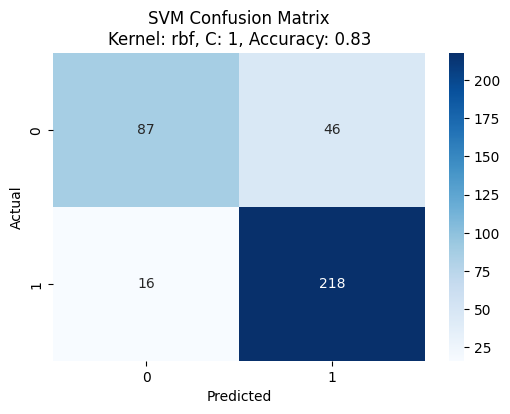


Kernel: rbf, C: 10
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       133
           1       0.83      0.94      0.89       234

    accuracy                           0.84       367
   macro avg       0.85      0.81      0.82       367
weighted avg       0.85      0.84      0.84       367



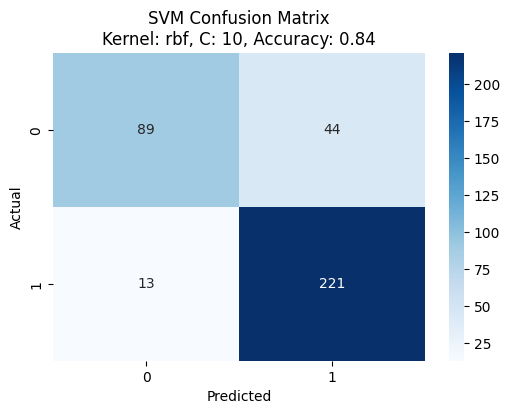

In [6]:
for kernel in kernels:
    for C_value in C_values:
        svm_model(kernel, C_value)

In [7]:
best_svm = SVC(kernel='linear', C=1)
best_svm.fit(X_train[:, :2], y_train) 

SVC(C=1, kernel='linear')

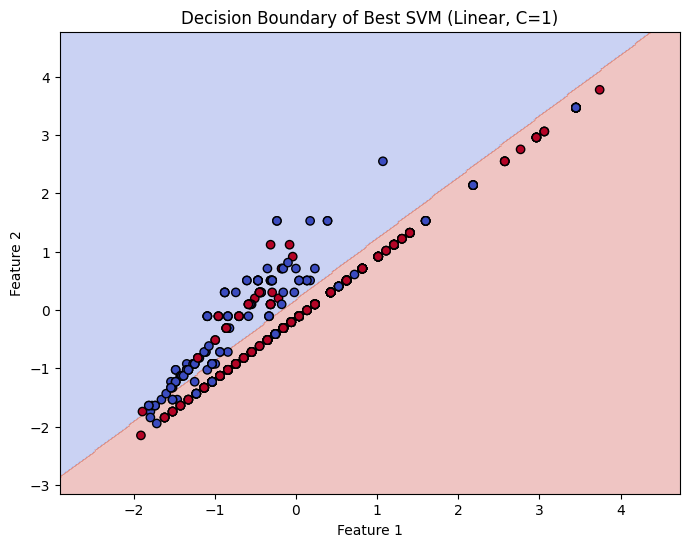

In [8]:
plt.figure(figsize=(8, 6))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap="coolwarm")
plt.title("Decision Boundary of Best SVM (Linear, C=1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


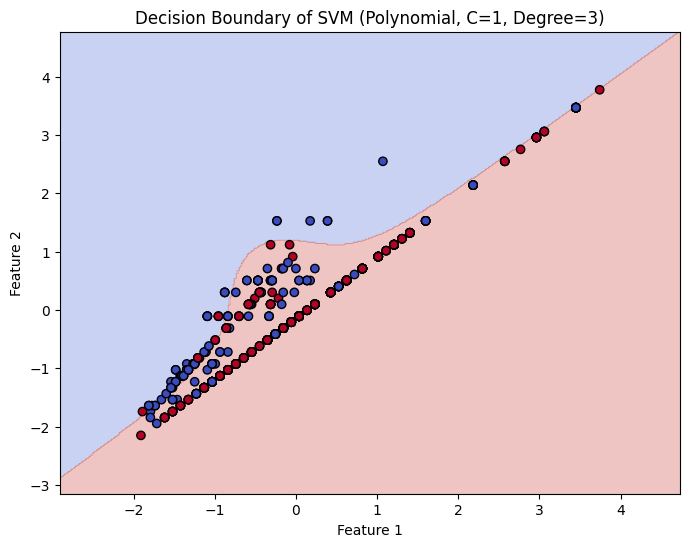

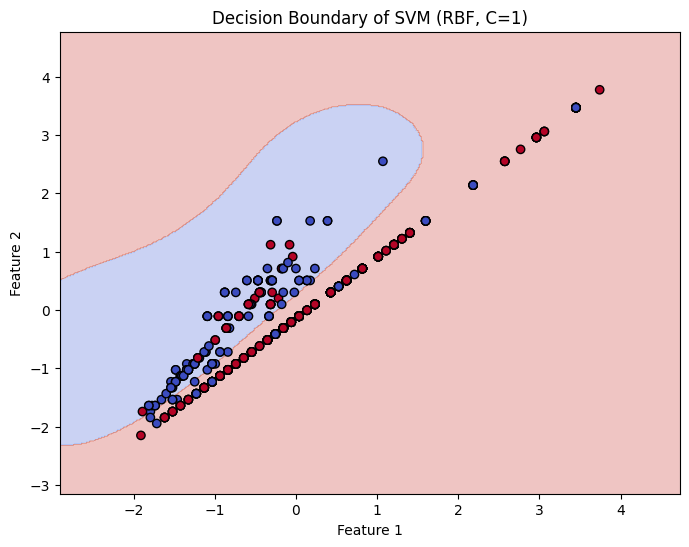

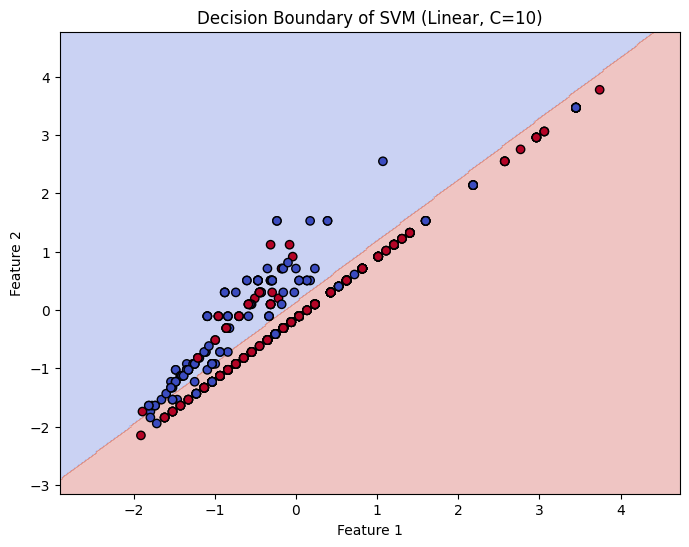

In [9]:
# Visualization function for decision boundary
def plot_decision_boundary(model, title):
    plt.figure(figsize=(8, 6))
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Polynomial Kernel (C=1, degree=3)
poly_svm = SVC(kernel='poly', C=1, degree=3)
poly_svm.fit(X_train[:, :2], y_train)
plot_decision_boundary(poly_svm, "Decision Boundary of SVM (Polynomial, C=1, Degree=3)")

# RBF Kernel (C=1, gamma='scale')
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train[:, :2], y_train)
plot_decision_boundary(rbf_svm, "Decision Boundary of SVM (RBF, C=1)")

# Linear Kernel (C=10)
linear_svm = SVC(kernel='linear', C=10)
linear_svm.fit(X_train[:, :2], y_train)
plot_decision_boundary(linear_svm, "Decision Boundary of SVM (Linear, C=10)")